# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric"

    
    print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
https://api.openweathermap.org/data/2.5/weather?q=margaret river&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 1 of Set 1 | margaret river
https://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 2 of Set 1 | port-aux-francais
https://api.openweathermap.org/data/2.5/weather?q=jamestown&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 3 of Set 1 | jamestown
https://api.openweathermap.org/data/2.5/weather?q=invercargill&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 4 of Set 1 | invercargill
https://api.openweathermap.org/data/2.5/weather?q=la libertad&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 5 of Set 1 | la libertad
https://api.openweathermap.org/data/2.5/weather?q=howard springs&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 6 of

https://api.openweathermap.org/data/2.5/weather?q=thompson&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 2 of Set 2 | thompson
https://api.openweathermap.org/data/2.5/weather?q=mejit&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 3 of Set 2 | mejit
https://api.openweathermap.org/data/2.5/weather?q=mulayjah&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 4 of Set 2 | mulayjah
https://api.openweathermap.org/data/2.5/weather?q=kerikeri&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 5 of Set 2 | kerikeri
https://api.openweathermap.org/data/2.5/weather?q=bocas del toro&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 6 of Set 2 | bocas del toro
https://api.openweathermap.org/data/2.5/weather?q=puerto baquerizo moreno&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 7 of Set 2 | puerto baquerizo moreno
https://api.openweathermap.org/data/2.5/weather?q=migori&a

https://api.openweathermap.org/data/2.5/weather?q=talnakh&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 6 of Set 3 | talnakh
https://api.openweathermap.org/data/2.5/weather?q=tatarbunary&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 7 of Set 3 | tatarbunary
https://api.openweathermap.org/data/2.5/weather?q=andalgala&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 8 of Set 3 | andalgala
https://api.openweathermap.org/data/2.5/weather?q=rizokarpaso&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 9 of Set 3 | rizokarpaso
https://api.openweathermap.org/data/2.5/weather?q=tanjung pandan&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 10 of Set 3 | tanjung pandan
https://api.openweathermap.org/data/2.5/weather?q=mount pearl&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 11 of Set 3 | mount pearl
https://api.openweathermap.org/data/2.5/weather?q=lebu&appid=8

https://api.openweathermap.org/data/2.5/weather?q=ballina&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 9 of Set 4 | ballina
https://api.openweathermap.org/data/2.5/weather?q=fortuna&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 10 of Set 4 | fortuna
https://api.openweathermap.org/data/2.5/weather?q=tranovaho&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 11 of Set 4 | tranovaho
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=galesong&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 12 of Set 4 | galesong
https://api.openweathermap.org/data/2.5/weather?q=kharp&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 13 of Set 4 | kharp
https://api.openweathermap.org/data/2.5/weather?q='ohonua&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 14 of Set 4 | 'ohonua
City not found. Skipping...
https://api.openweathermap.org/data/2.5/wea

https://api.openweathermap.org/data/2.5/weather?q=pisco&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 12 of Set 5 | pisco
https://api.openweathermap.org/data/2.5/weather?q=tamanrasset&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 13 of Set 5 | tamanrasset
https://api.openweathermap.org/data/2.5/weather?q=cabedelo&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 14 of Set 5 | cabedelo
https://api.openweathermap.org/data/2.5/weather?q=naryn&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 15 of Set 5 | naryn
https://api.openweathermap.org/data/2.5/weather?q=ardakan&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 16 of Set 5 | ardakan
https://api.openweathermap.org/data/2.5/weather?q=port elizabeth&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 17 of Set 5 | port elizabeth
https://api.openweathermap.org/data/2.5/weather?q=ribeira grande&appid=8f69b0d90ac3d

https://api.openweathermap.org/data/2.5/weather?q=ulladulla&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 16 of Set 6 | ulladulla
https://api.openweathermap.org/data/2.5/weather?q=udachny&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 17 of Set 6 | udachny
https://api.openweathermap.org/data/2.5/weather?q=carloforte&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 18 of Set 6 | carloforte
https://api.openweathermap.org/data/2.5/weather?q=jeddah&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 19 of Set 6 | jeddah
https://api.openweathermap.org/data/2.5/weather?q=ola&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 20 of Set 6 | ola
https://api.openweathermap.org/data/2.5/weather?q=lompoc&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 21 of Set 6 | lompoc
https://api.openweathermap.org/data/2.5/weather?q=vilyuchinsk&appid=8f69b0d90ac3d06edbf47543e3647cac&u

https://api.openweathermap.org/data/2.5/weather?q=tan-tan&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 20 of Set 7 | tan-tan
https://api.openweathermap.org/data/2.5/weather?q=karratha&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 21 of Set 7 | karratha
https://api.openweathermap.org/data/2.5/weather?q=san antonio de pale&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 22 of Set 7 | san antonio de pale
https://api.openweathermap.org/data/2.5/weather?q=pama&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 23 of Set 7 | pama
https://api.openweathermap.org/data/2.5/weather?q=gaigeturi&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 24 of Set 7 | gaigeturi
https://api.openweathermap.org/data/2.5/weather?q=muynoq&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 25 of Set 7 | muynoq
https://api.openweathermap.org/data/2.5/weather?q=laojunmiao&appid=8f69b0d90ac

https://api.openweathermap.org/data/2.5/weather?q=sinnar&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 24 of Set 8 | sinnar
https://api.openweathermap.org/data/2.5/weather?q=altamont&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 25 of Set 8 | altamont
https://api.openweathermap.org/data/2.5/weather?q=iwanai&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 26 of Set 8 | iwanai
https://api.openweathermap.org/data/2.5/weather?q=saint-francois&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 27 of Set 8 | saint-francois
https://api.openweathermap.org/data/2.5/weather?q=viedma&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 28 of Set 8 | viedma
https://api.openweathermap.org/data/2.5/weather?q=port glaud&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 29 of Set 8 | port glaud
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=jackso

https://api.openweathermap.org/data/2.5/weather?q=akureyri&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 27 of Set 9 | akureyri
https://api.openweathermap.org/data/2.5/weather?q=balkanabat&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 28 of Set 9 | balkanabat
https://api.openweathermap.org/data/2.5/weather?q=uturoa&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 29 of Set 9 | uturoa
https://api.openweathermap.org/data/2.5/weather?q=mahina&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 30 of Set 9 | mahina
https://api.openweathermap.org/data/2.5/weather?q=ylitornio&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 31 of Set 9 | ylitornio
https://api.openweathermap.org/data/2.5/weather?q=malindi&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 32 of Set 9 | malindi
https://api.openweathermap.org/data/2.5/weather?q=gadzhiyevo&appid=8f69b0d90ac3d06edbf47543e

https://api.openweathermap.org/data/2.5/weather?q=mugia&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 31 of Set 10 | mugia
https://api.openweathermap.org/data/2.5/weather?q=moorhead&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 32 of Set 10 | moorhead
https://api.openweathermap.org/data/2.5/weather?q=okha&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 33 of Set 10 | okha
https://api.openweathermap.org/data/2.5/weather?q=luanda&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 34 of Set 10 | luanda
https://api.openweathermap.org/data/2.5/weather?q=argo&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 35 of Set 10 | argo
https://api.openweathermap.org/data/2.5/weather?q=sarmiento&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 36 of Set 10 | sarmiento
https://api.openweathermap.org/data/2.5/weather?q=mata-utu&appid=8f69b0d90ac3d06edbf47543e3647cac&units=me

City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=ceres&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 35 of Set 11 | ceres
https://api.openweathermap.org/data/2.5/weather?q=whakatane&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 36 of Set 11 | whakatane
https://api.openweathermap.org/data/2.5/weather?q=puerto armuelles&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 37 of Set 11 | puerto armuelles
https://api.openweathermap.org/data/2.5/weather?q=bhakkar&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 38 of Set 11 | bhakkar
https://api.openweathermap.org/data/2.5/weather?q=al bardiyah&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 39 of Set 11 | al bardiyah
https://api.openweathermap.org/data/2.5/weather?q=mani&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 40 of Set 11 | mani
https://api.openweathermap.org/data/2.5/weathe

https://api.openweathermap.org/data/2.5/weather?q=al wafrah&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 38 of Set 12 | al wafrah
https://api.openweathermap.org/data/2.5/weather?q=xining&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 39 of Set 12 | xining
https://api.openweathermap.org/data/2.5/weather?q=obsharovka&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 40 of Set 12 | obsharovka
https://api.openweathermap.org/data/2.5/weather?q=dawson creek&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 41 of Set 12 | dawson creek
https://api.openweathermap.org/data/2.5/weather?q=little cayman&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 42 of Set 12 | little cayman
City not found. Skipping...
https://api.openweathermap.org/data/2.5/weather?q=horta&appid=8f69b0d90ac3d06edbf47543e3647cac&units=metric
Processing Record 43 of Set 12 | horta
https://api.openweathermap.org/data/2.5/

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,margaret river,-33.9500,115.0667,19.38,86,7,5.64,AU,1715264790
1,port-aux-francais,-49.3500,70.2167,5.21,74,13,7.90,TF,1715264790
2,jamestown,42.0970,-79.2353,13.34,73,0,5.14,US,1715264791
3,invercargill,-46.4000,168.3500,7.79,84,100,3.58,NZ,1715264791
4,la libertad,-2.2333,-80.9000,25.81,83,75,2.57,EC,1715264792


In [16]:
# Export the City_Data into a csv

os.makedirs('output_data')

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,margaret river,-33.9500,115.0667,19.38,86,7,5.64,AU,1715264790
1,port-aux-francais,-49.3500,70.2167,5.21,74,13,7.90,TF,1715264790
2,jamestown,42.0970,-79.2353,13.34,73,0,5.14,US,1715264791
3,invercargill,-46.4000,168.3500,7.79,84,100,3.58,NZ,1715264791
4,la libertad,-2.2333,-80.9000,25.81,83,75,2.57,EC,1715264792


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

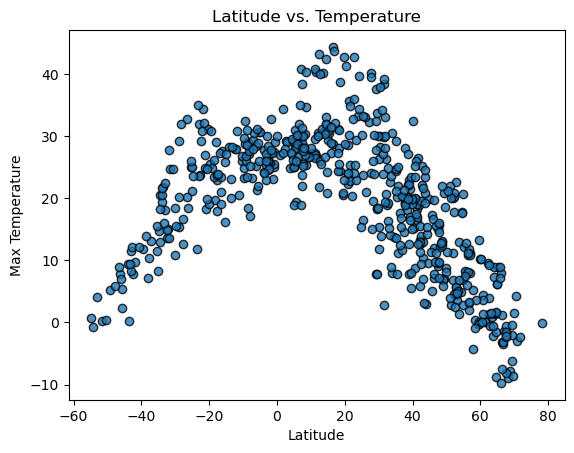

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Temperature') 
plt.ylabel('Max Temperature') 
plt.xlabel('Latitude') 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

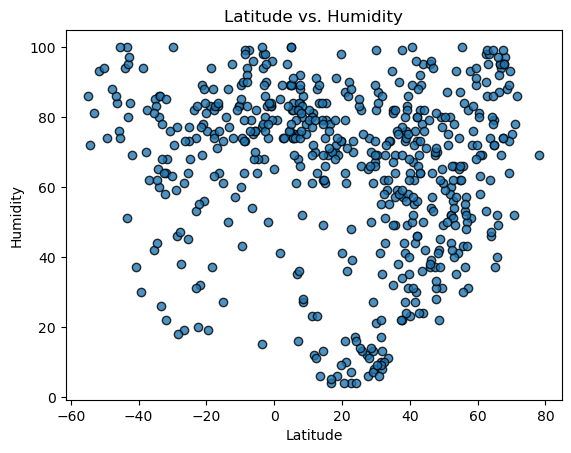

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Humidity')  
plt.ylabel('Humidity')  
plt.xlabel('Latitude')  

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

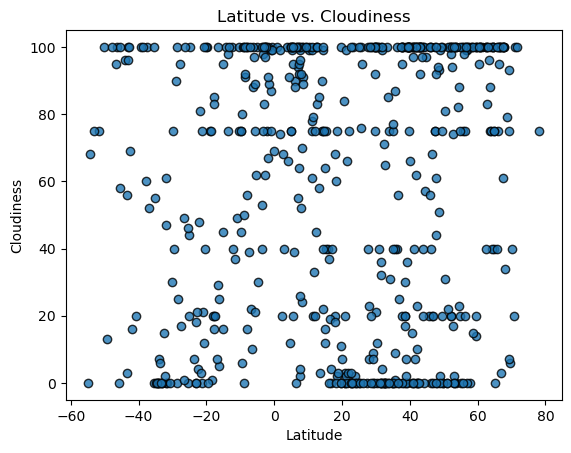

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Cloudiness')
plt.ylabel('Cloudiness')  
plt.xlabel('Latitude')  

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

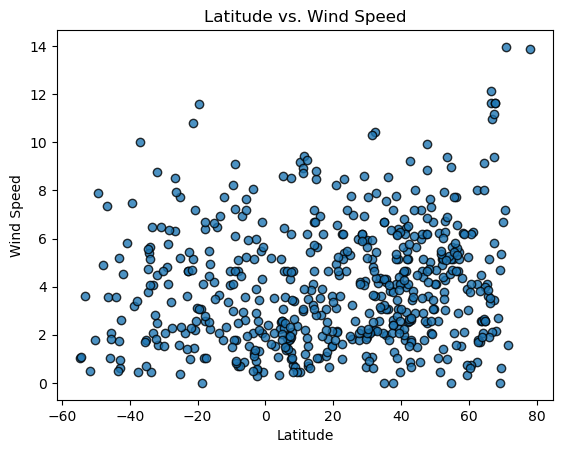

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolor='black', linewidth=1, marker='o', alpha=0.8, label='Cities')

# Incorporate the other graph properties
plt.title('Latitude vs. Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE